In [2]:
import pandas
import configparser
import psycopg2

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [4]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [5]:
sql = "select * from student"

In [6]:
df = pandas.read_sql_query(sql,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [7]:
sql = "select professor.p_name, course.c_name from professor inner join course on professor.p_email = course.p_email"

In [8]:
df = pandas.read_sql_query(sql,conn)
df[:]

,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


In [9]:
sql = """
    select count(*) as num_student, c_number
    from enroll
    group by c_number
    """

In [10]:
df = pandas.read_sql_query(sql,conn)
df[:]

,num_student,c_number
0,1,c2
1,2,c3
2,3,c1


<AxesSubplot:xlabel='c_number'>

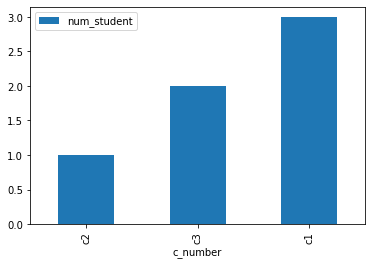

In [11]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(x='c_number',y='num_student')

In [12]:
sql = """
    select professor.p_name,count(*) as num_course
    from professor 
    inner join course 
    on professor.p_email = course.p_email
    group by professor.p_name
"""

In [13]:
df = pandas.read_sql_query(sql,conn)

df[:]

,p_name,num_course
0,p3,3
1,p2,1


<AxesSubplot:xlabel='p_name'>

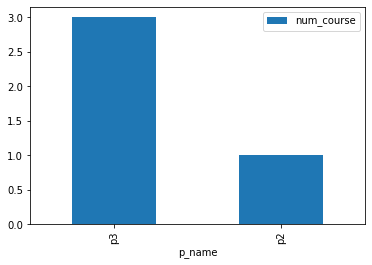

In [14]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(x='p_name',y='num_course')

In [15]:
sql = """
    insert into student(s_email,s_name,major)
    values('{}','{}','{}')
    """.format('s5@jmu.edu','s5','GS')

print(sql)


    insert into student(s_email,s_name,major)
    values('s5@jmu.edu','s5','GS')
    


In [16]:
cur=conn.cursor()

In [19]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "student_pkey"
DETAIL:  Key (s_email)=(s5@jmu.edu) already exists.


In [18]:
conn.commit()

In [20]:
conn.rollback()

In [21]:
df=pandas.read_sql_query('select * from student', conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [24]:
sql = """
    insert into professor(p_email,p_name,office)
    values('{}','{}','{}')
    """.format('p4@jmu.edu','p4','o4')

print(sql)


    insert into professor(p_email,p_name,office)
    values('p4@jmu.edu','p4','o4')
    


In [25]:
cur=conn.cursor()

In [26]:
cur.execute(sql)

In [27]:
conn.commit()

In [28]:
df=pandas.read_sql_query('select * from professor', conn)
df[:]

,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [42]:
sql = """
    insert into course(c_number,c_name,room,p_email)
    values('{}','{}','{}','{}')
    """.format('c5','linkedin','r2','p4@jmu.edu')

print(sql)


    insert into course(c_number,c_name,room,p_email)
    values('c5','linkedin','r2','p4@jmu.edu')
    


In [38]:
cur=conn.cursor()

In [39]:
cur.execute(sql)

In [40]:
conn.commit()

In [43]:
df=pandas.read_sql_query('select * from course', conn)
df[:]

,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [68]:
sql = """
    update course
    SET p_email='p4@jmu.edu'
    WHERE p_email='p2@jmu.edu'
    """

print(sql)


    update course
    SET p_email='p4@jmu.edu'
    WHERE p_email='p2@jmu.edu'
    


In [61]:
cur=conn.cursor()

In [69]:
cur.execute(sql)

In [70]:
conn.commit()

In [71]:
df=pandas.read_sql_query('select * from course', conn)
df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [72]:
sql = """
    DELETE from professor
    WHERE p_email='p2@jmu.edu'
    """

print(sql)


    DELETE from professor
    WHERE p_email='p2@jmu.edu'
    


In [73]:
cur=conn.cursor()

In [74]:
cur.execute(sql)

In [75]:
conn.commit()

In [76]:
df=pandas.read_sql_query('select * from professor', conn)
df[:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4


In [77]:
cur.close()
conn.close()